Presteps: 1) Importing neccessary libraries

In [109]:
from sklearn.naive_bayes import BernoulliNB
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Presteps: 2) Loading all the CSV files Using read_csv() functions

In [110]:
vocabulary=pd.read_csv("vocabulary.csv")
xtrain=pd.read_csv("Xtrain.csv")
ytrain=pd.read_csv("yTrain.csv")
xtest=pd.read_csv("XTest.csv")
ytest=pd.read_csv("yTest.csv")

Part a) The following question does following parts:

1) Fit a Naive Bayes classiﬁer to the provided data (with no Laplacian smoothing). 

2) Producing a confusion matrix for the Naive Bayes classiﬁer. 

3) Ploting the matrix as a heatmap. 

C:\Users\Anupam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anupam\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Confusion Mattrix:
[[98  0]
 [45  1]]


Text(83.4,0.5,'predicted label')

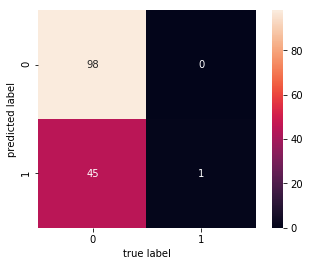

In [144]:
from sklearn.metrics import confusion_matrix
naive = BernoulliNB(alpha=0.0)
model = naive.fit(xtrain,ytrain)
y_pred = naive.predict(xtest)
conf = confusion_matrix(ytest, y_pred)
print("Confusion Mattrix:")
print(conf)
import seaborn as sns
%matplotlib inline
fig2=plt.figure()
fig2.add_subplot(111)
sns.heatmap(conf,annot=True,square=True,cbar=True,fmt="d")
plt.xlabel("true label")
plt.ylabel("predicted label")

Part b) Calculate precision and recall when The onion is treated as positive?

In [145]:
tp=conf[1,1]
fn=conf[1,0]
fp=conf[0,1]
tn=conf[0,0]

precision = (tp/(tp+fp))
recall = (tp/(tp+fn))
print("Precision when The onion is positive",precision)
print("Recall when The onion is positive",recall)



Precision when The onion is positive 1.0
Recall when The onion is positive 0.0217391304348


Part c) Calculate precision and recall when The Economist is treated as positive?

In [146]:
tp1 = conf[0,0]
fn1 = conf[0,1]
fp1 = conf[1,0]
tn1 = conf[1,1]

precision1 = (tp1/(tp1+fp1))
recall1 = (tp1/(tp1+fn1))

print("Precision when The economist is positive",precision1)
print("Recall  when The economist is positive",recall1)

Precision when The economist is positive 0.685314685315
Recall  when The economist is positive 1.0


Part d)Calculate MissClassification Rate for smooth and unsmooth models

In [147]:
#create vectors for actual labels and predicted labels...
class_score = accuracy_score(ytest, y_pred, normalize=False) / (ytest.size)
print("Misclassification rate without any smoothing",1-class_score)
naive_smooth = BernoulliNB(alpha=1.0)
model = naive_smooth.fit(xtrain,ytrain)
y_pred = naive_smooth.predict(xtest)
smooth_class_score = accuracy_score(ytest, y_pred, normalize=False)/ (ytest.size)
print("Misclassification rate when Laplacian smoothening ",1-smooth_class_score)

Misclassification rate without any smoothing 0.3125


C:\Users\Anupam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Misclassification rate when Laplacian smoothening  0.138888888889


Part e) i)True class of 45th element

In [148]:
print("True class of 45th element ",ytest.iloc[44,0])

True class of 45th element  1


Part e) i)Predicted class of 45th element

In [149]:
print("Predicted class of 45th element ",y_pred[44])

Predicted class of 45th element  1


Part e) iii)Estimated Prosterior probability for 45th observations for smoothened and unsmoothened model

In [150]:
print("Posterior probablity for unsmoothen-ed model:",naive.predict_proba(xtest)[44])
print("Posterior probablity for smoothen-ed model:",naive_smooth.predict_proba(xtest)[44])

Posterior probablity for unsmoothen-ed model: [  1.00000000e+00   1.02199885e-41]
Posterior probablity for smoothen-ed model: [ 0.2652005  0.7347995]


In [151]:
from IPython.display import HTML



HTML('''<script>

code_show=true; 

function code_toggle() {

 if (code_show){

 $('div.input').hide();

 } else {

 $('div.input').show();
 
 }

 code_show = !code_show

} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')